# **Prepared by-**

## **Karansinh Padhiar - padhiar.karan@gmail.com**

# **Predicting Toronto Ferry Activity -- Redemption Count and Sales Count**

## **Reading and Preprocessing the Dataset**


In [4]:
# importing necessary libraries
from Model import RedemptionModel
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
def load_data(filepath):
    """
    Load and preprocess daily time-series data from a CSV file.

    Args:
        filepath (str): Path to the CSV file containing raw timestamped data.

    Returns:
        pd.DataFrame: A cleaned and feature-enriched daily time-series DataFrame.
    """

    df = pd.read_csv(filepath,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    df.set_index('Timestamp', inplace=True)  # convert to time-aware
    df_daily = df.resample('d').sum()

    # Extract time-based features
    df_daily['day_of_week'] = df_daily.reset_index().Timestamp.dt.dayofweek.values
    df_daily['is_weekend'] = df_daily['day_of_week'].isin([5,6]).astype(int)
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values

    return df_daily

In [6]:
# loading the dataset
filepath = "./Toronto Island Ferry Ticket Counts.csv"
df = load_data(filepath)
print("df.shape = ", df.shape)
df.head()

df.shape =  (3695, 7)


,_id,Redemption Count,Sales Count,day_of_week,is_weekend,monthly,quarter
Timestamp,,,,,,,
2015-05-01,987186,1,4,4,0,5,2
2015-05-02,0,0,0,5,1,5,2
2015-05-03,0,0,0,6,1,5,2
2015-05-04,4688915,12,75,0,0,5,2
2015-05-05,11350615,537,549,1,0,5,2


## **Redemption Count**

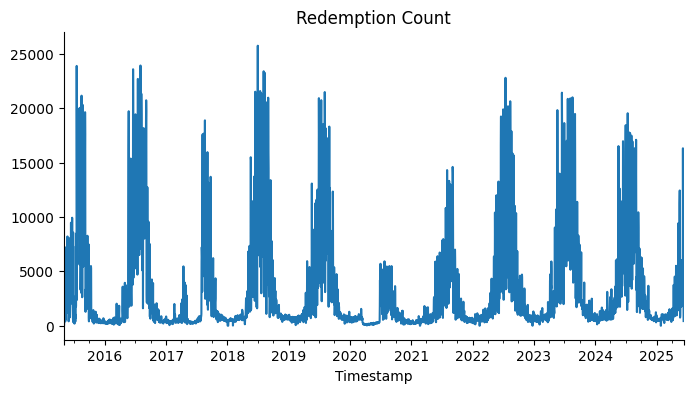

In [7]:
# visualize the trend of `Redemption Count`
df['Redemption Count'].plot(kind='line', figsize=(8, 4), title='Redemption Count')
plt.gca().spines[['top', 'right']].set_visible(False)

[INFO] Running CV split 0 ##############################
[INFO] Running CV split 1 ##############################
[INFO] Running CV split 2 ##############################
[INFO] Running CV split 3 ##############################


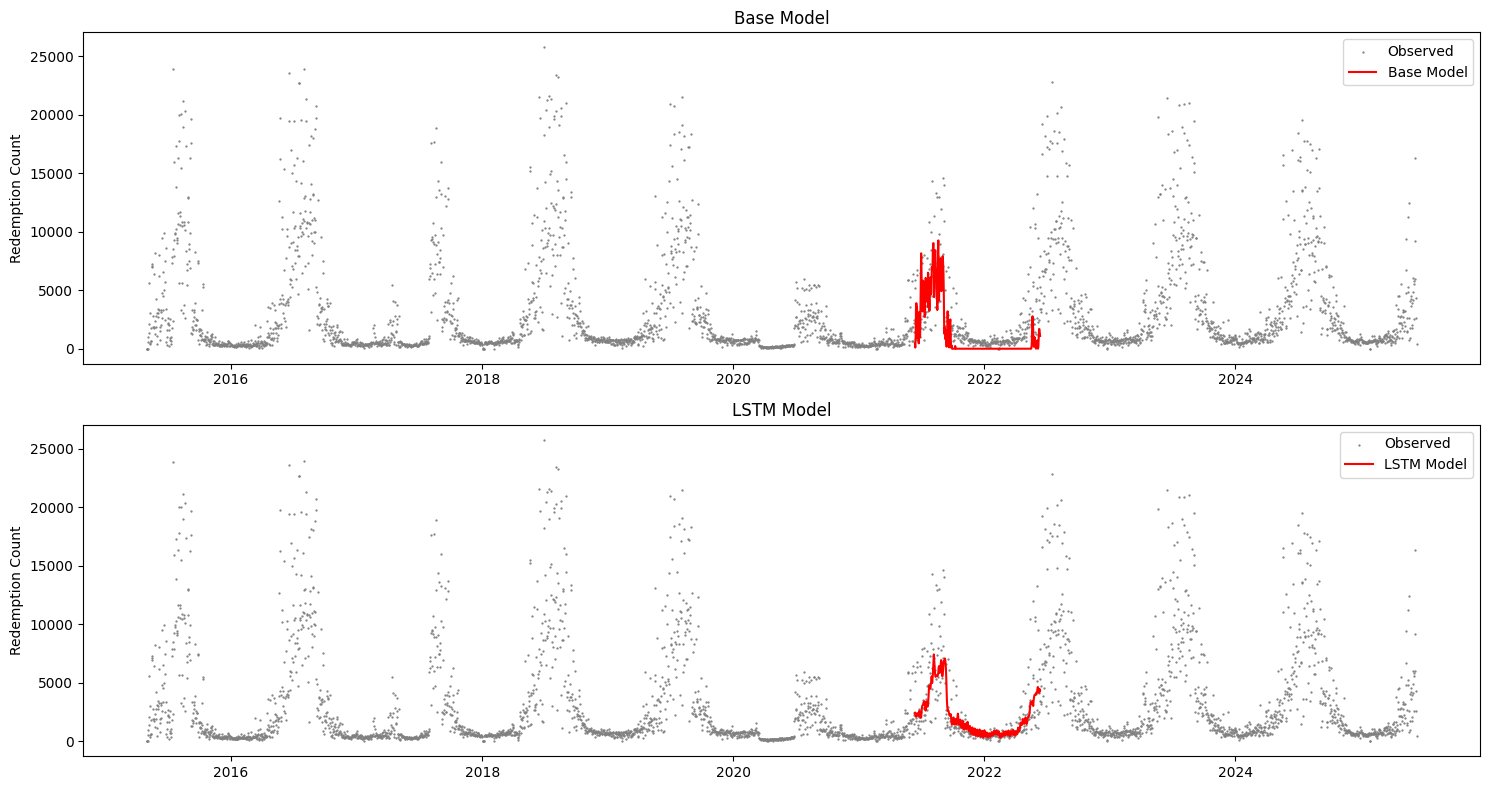

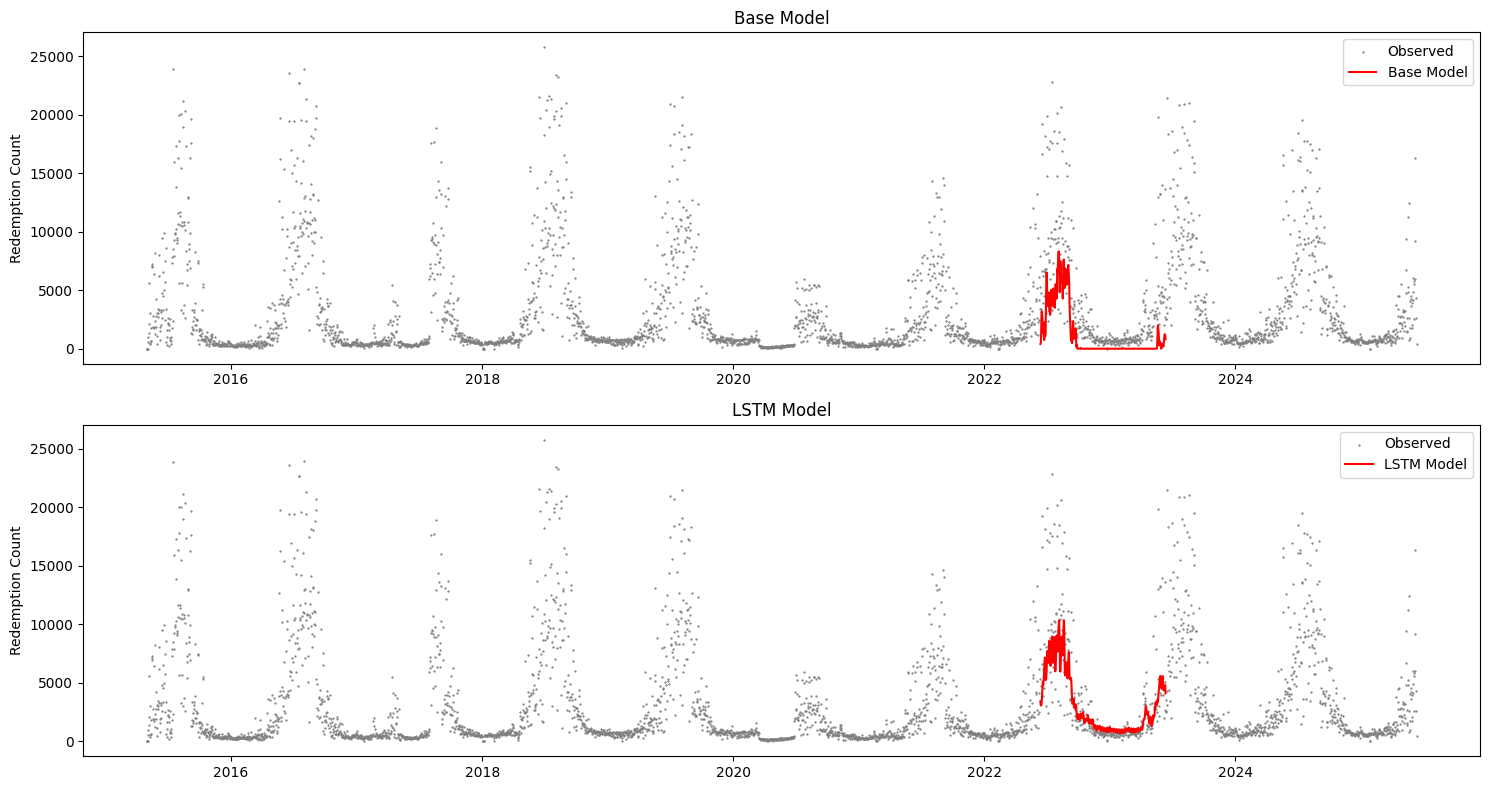

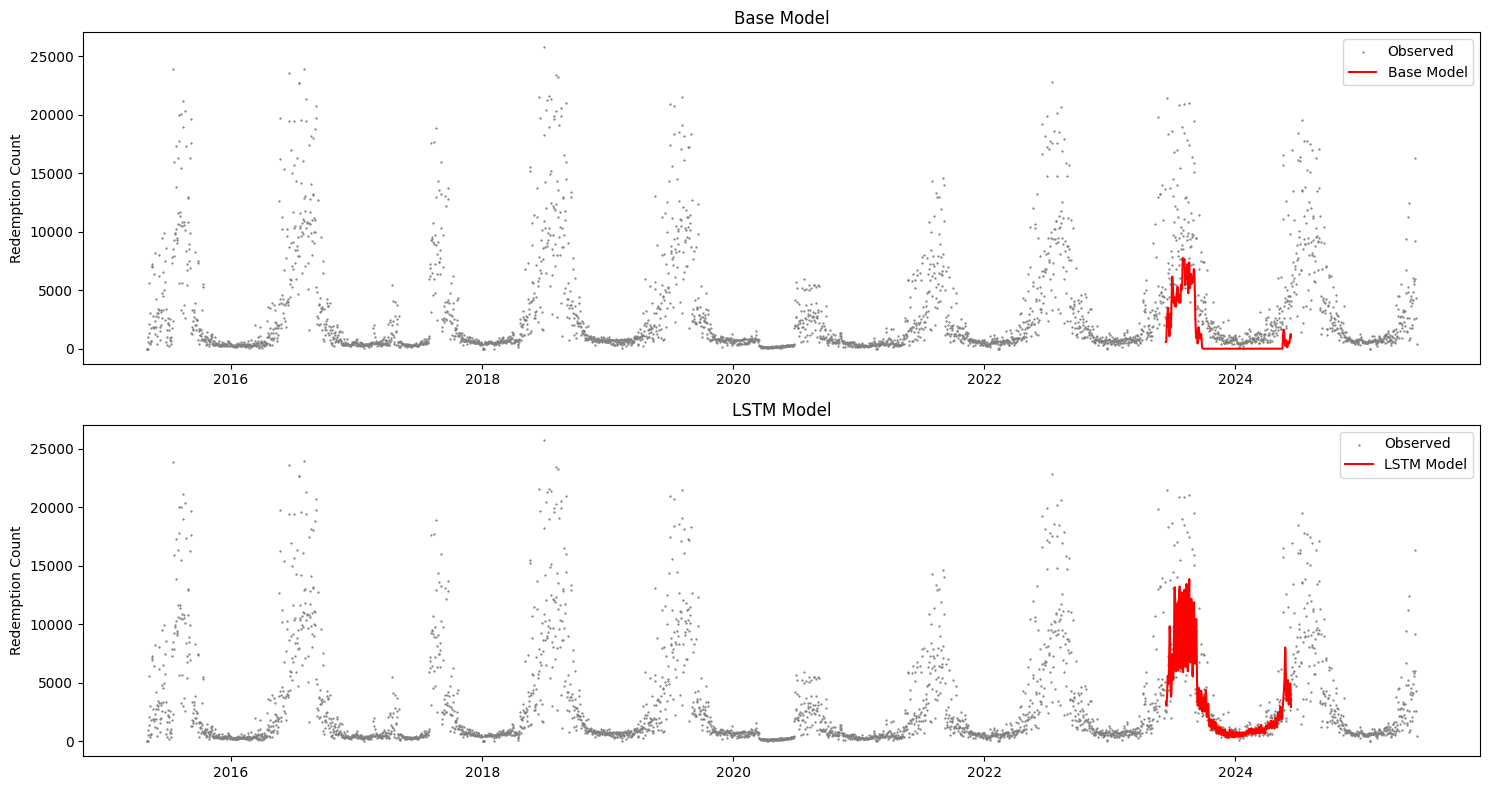

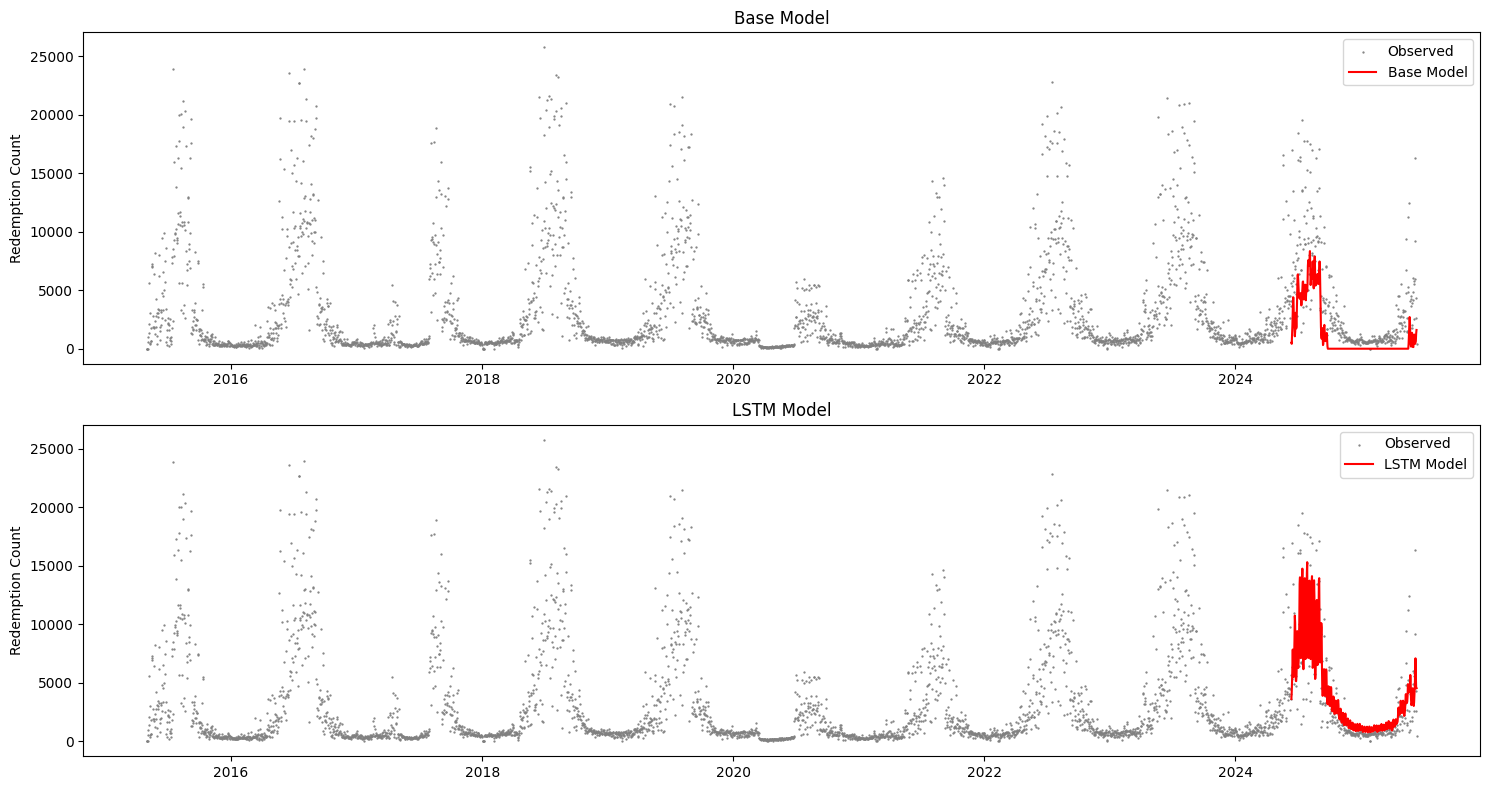

In [8]:
# initialize the RedemptionModel class and execute the models
rm = RedemptionModel(df, target_col='Redemption Count')
rm.run_models()

In [9]:
# Print evaluation metrics

print("Redemption Count Forecasting Model")
print("Base Model-", "MAPE score-", rm.results["Base"]["MAPE"])
print("LSTM Model-", "MAPE score-", rm.results["LSTM"]["MAPE"])
print()
print("Base Model-", "MAE score-", rm.results["Base"]["MAE"])
print("LSTM Model-", "MAE score-", rm.results["LSTM"]["MAE"])

Redemption Count Forecasting Model
Base Model- MAPE score- {0: np.float64(89.64118507200283), 1: np.float64(85.55337343457072), 2: np.float64(84.95029583241724), 3: np.float64(86.88482636843446)}
LSTM Model- MAPE score- {0: np.float64(50.247683618028894), 1: np.float64(48.48383657787441), 2: np.float64(36.88359311408351), 3: np.float64(60.66880875627806)}

Base Model- MAE score- {0: 1738.4294531462715, 1: 2813.9664955742187, 2: 2762.9251465517013, 3: 2621.6837694198452}
LSTM Model- MAE score- {0: 1112.1030254193058, 1: 1681.2496365769678, 2: 1436.8822703208214, 3: 1356.7354944118695}


---

### Model Evaluation Metrics

The performance of both the baseline and improved LSTM models was evaluated using **Mean Absolute Percentage Error (MAPE)** and **Mean Absolute Error (MAE)** across four cross-validation folds.

#### Redemption Count Forecasting

| Model       | Fold 0 | Fold 1 | Fold 2 | Fold 3 | Average |
|-------------|--------|--------|--------|--------|---------|
| **Base - MAPE (%)** | 89.64 | 85.55 | 84.95 | 86.88 | **86.26** |
| **LSTM - MAPE (%)** | 50.25 | 48.48 | 36.88 | 60.67 | **49.57** |
| **Base - MAE**      | 1738.43 | 2813.97 | 2762.93 | 2621.68 | **2484.75** |
| **LSTM - MAE**      | 1112.10 | 1681.25 | 1436.88 | 1356.74 | **1396.74** |

**→ Result:** The LSTM model reduced MAPE by approximately **43%**, and MAE by around **44%** on average, compared to the base model.

---

## **Sales Count**

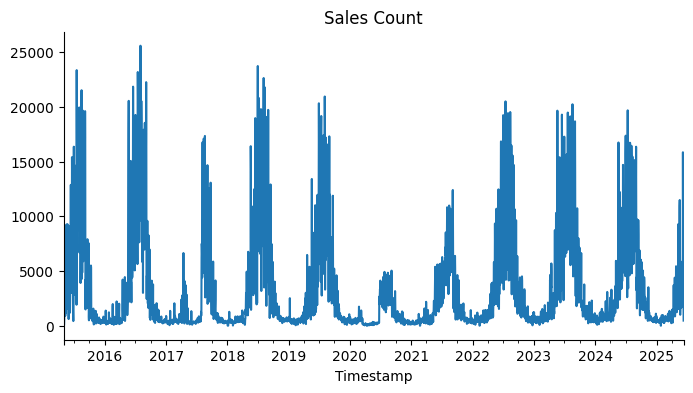

In [10]:
# visualize the trend of `Sales Count`
df['Sales Count'].plot(kind='line', figsize=(8, 4), title='Sales Count')
plt.gca().spines[['top', 'right']].set_visible(False)

[INFO] Running CV split 0 ##############################
[INFO] Running CV split 1 ##############################
[INFO] Running CV split 2 ##############################
[INFO] Running CV split 3 ##############################


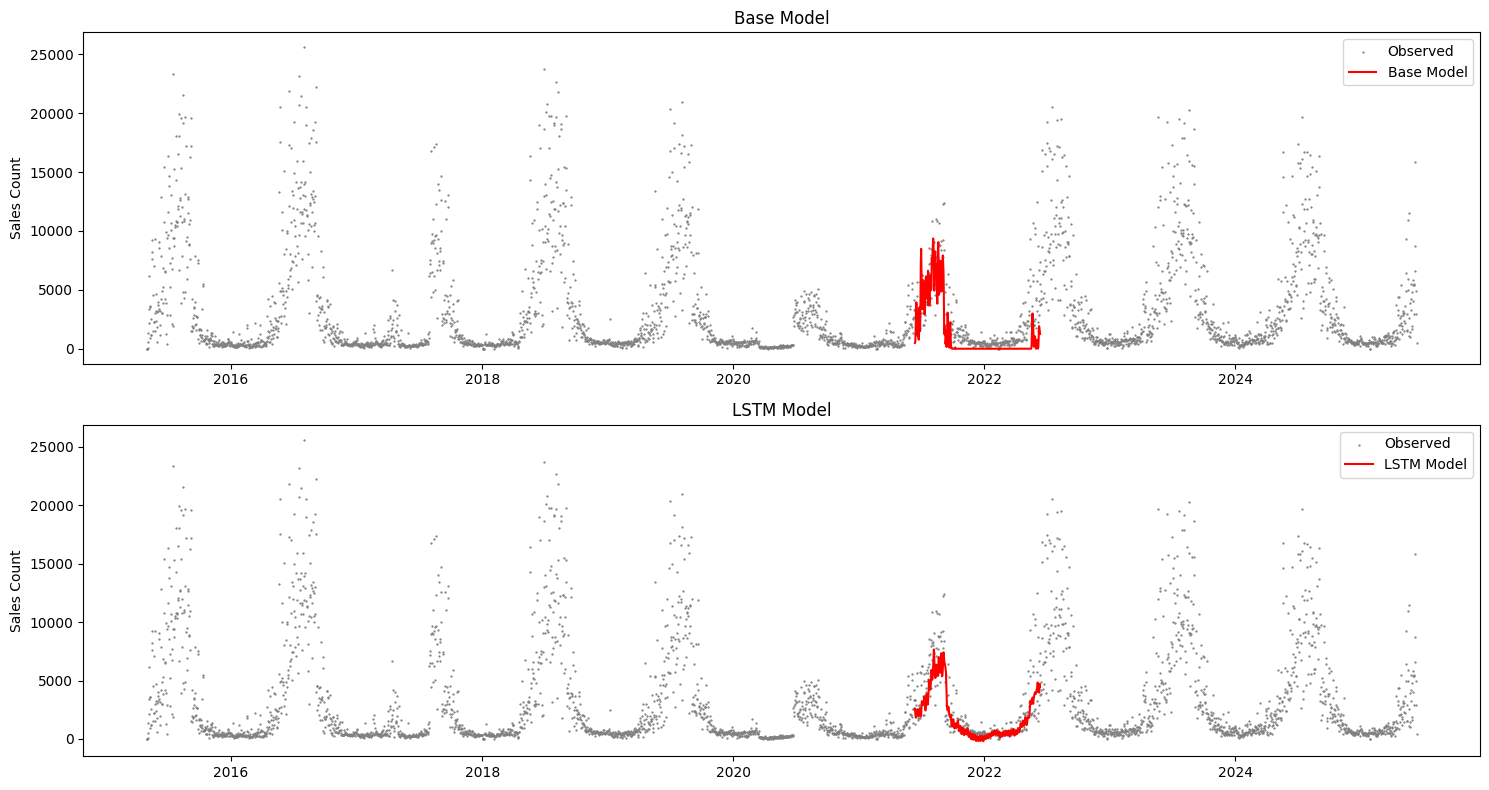

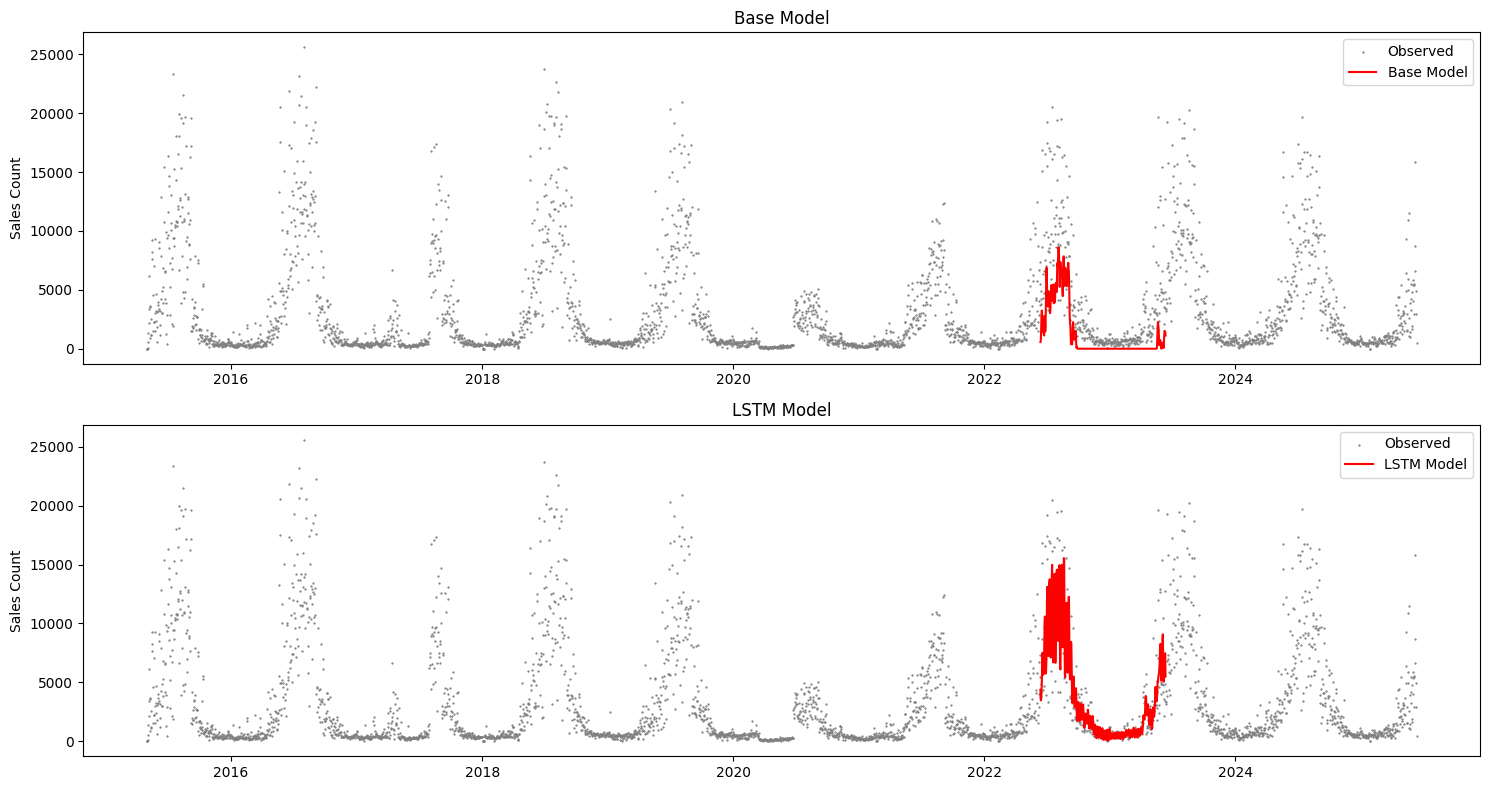

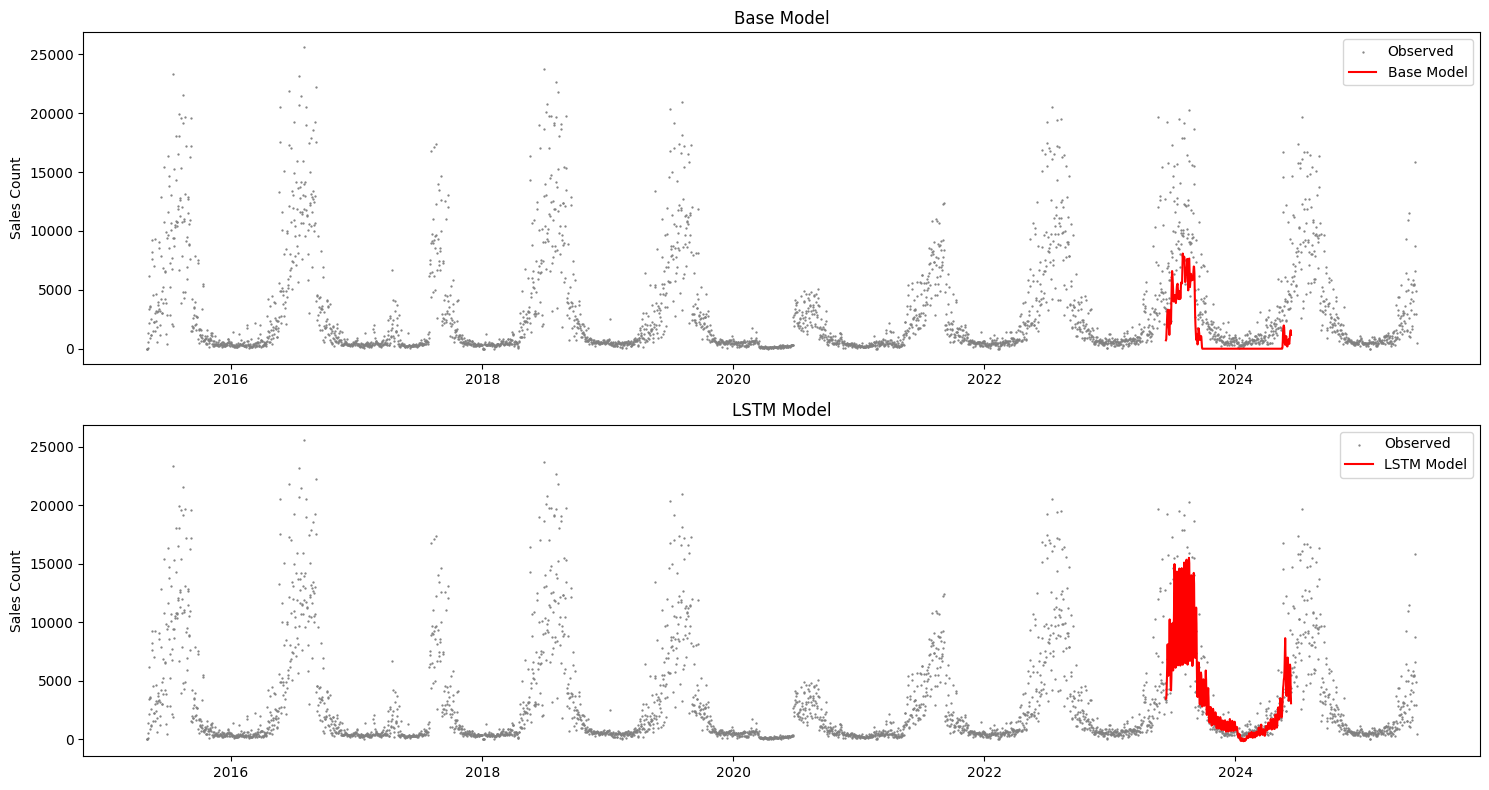

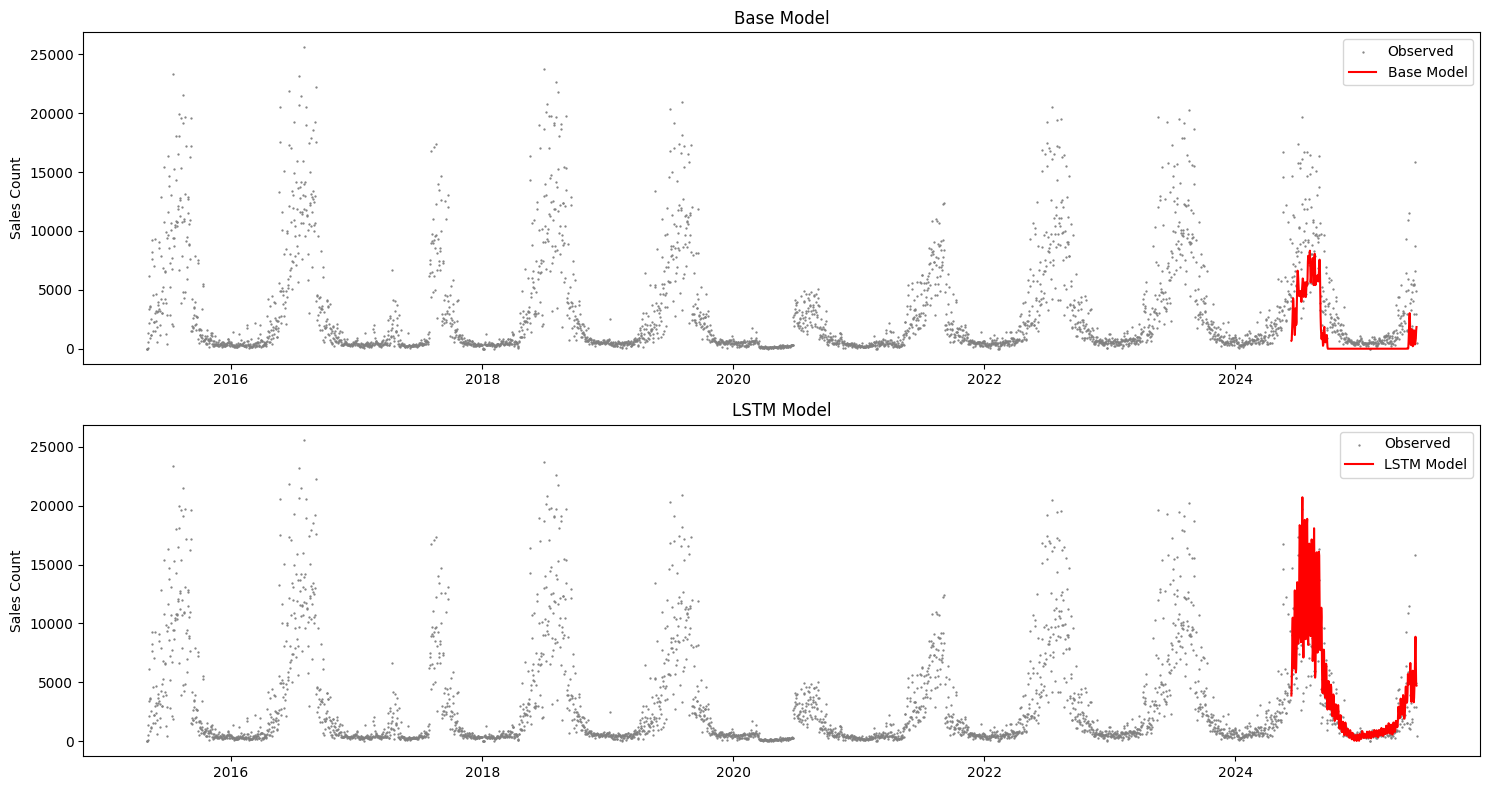

In [11]:
# initialize the RedemptionModel class and execute the models
rm = RedemptionModel(df, target_col='Sales Count')
rm.run_models()

In [12]:
# Print evaluation metrics

print("Sales Count Forecasting Model")
print("Base Model-", "MAPE score-", rm.results["Base"]["MAPE"])
print("LSTM Model-", "MAPE score-", rm.results["LSTM"]["MAPE"])
print()
print("Base Model-", "MAE score-", rm.results["Base"]["MAE"])
print("LSTM Model-", "MAE score-", rm.results["LSTM"]["MAE"])

Sales Count Forecasting Model
Base Model- MAPE score- {0: np.float64(81.67269482416161), 1: np.float64(85.1556896040003), 2: np.float64(84.86202389762347), 3: np.float64(85.34149211346357)}
LSTM Model- MAPE score- {0: np.float64(47.741762244301626), 1: np.float64(47.391015154336515), 2: np.float64(51.96226248734413), 3: np.float64(49.78578659395761)}

Base Model- MAE score- {0: 1485.0916975647408, 1: 2740.567542502672, 2: 2655.5003644274266, 3: 2487.691876857595}
LSTM Model- MAE score- {0: 1005.0012172516984, 1: 1335.2959058227132, 2: 1330.8534658961828, 3: 1307.3880774400286}


---

### Model Evaluation Metrics

The performance of both the baseline and improved LSTM models was evaluated using **Mean Absolute Percentage Error (MAPE)** and **Mean Absolute Error (MAE)** across four cross-validation folds.

#### Sales Count Forecasting

| Model       | Fold 0 | Fold 1 | Fold 2 | Fold 3 | Average |
|-------------|--------|--------|--------|--------|---------|
| **Base - MAPE (%)** | 81.67 | 85.16 | 84.86 | 85.34 | **84.26** |
| **LSTM - MAPE (%)** | 47.74 | 47.39 | 51.96 | 49.79 | **49.72** |
| **Base - MAE**      | 1485.09 | 2740.57 | 2655.50 | 2487.69 | **2342.22** |
| **LSTM - MAE**      | 1005.00 | 1335.30 | 1330.85 | 1307.39 | **1244.14** |

**→ Result:** The LSTM model reduced MAPE by approximately **41%**, and MAE by nearly **47%** on average.

---

# **Summary**

The LSTM models significantly outperformed the baseline decomposition approach in both forecasting tasks. They demonstrated:
- Lower forecasting errors across all validation folds.
- Improved generalization to seasonal fluctuations and short-term trends.
- Strong consistency in performance for both redemption and sales time series.

---
